In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import os

# Mobility ingestion 

In [2]:
# Ruta a la carpeta donde están los archivos .xlsx
ruta_carpeta = 'C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Mobilidad/Train'  

In [3]:
"""
# Crear una lista para almacenar los DataFrames
lista_dfs = []

# Iterar sobre cada archivo en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith('.xlsx'):
        # Leer el archivo Excel
        df = pd.read_excel(os.path.join(ruta_carpeta, archivo))
        # Añadir el DataFrame a la lista
        lista_dfs.append(df)
"""


In [4]:
# Concatenar todos los DataFrames en uno solo
df_unido = pd.concat(lista_dfs, ignore_index=True)

# Mostrar el DataFrame resultante
df_unido.head(3)

,Carril,Fecha Trafico,Fecha,Hora,dia,dia-num,mes-num,mes,año,Velocidad (Km/h),...,Comuna,codigo comuna,nombre comuna,Nº vehiculos long 4,Intensidad (veh/h),Ocupación (%),Categoria 1 (Veh/h),Categoria 2 (Veh/h),Categoria 3 (Veh/h),Categoria 4 (Veh/h)
0,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01 00:00:00,2021-01-01,0,Viernes,5,1,Enero,2021,24.0,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01 01:00:00,2021-01-01,1,Viernes,5,1,Enero,2021,21.0,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01 02:00:00,2021-01-01,2,Viernes,5,1,Enero,2021,22.0,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convertir las columnas de tipo object a category
for col in df_unido.select_dtypes(include='object').columns:
    df_unido[col] = df_unido[col].astype('category')

In [6]:
df_unido = df_unido.set_index('Fecha')

In [7]:
# Guardar el DataFrame en un archivo HDF5
df_unido.to_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Mobilidad/Train/df_unido.h5', key='df', mode='w', format = 'table')

C:\Users\MARIA PAULA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tables\leaf.py:323: RuntimeWarning: overflow encountered in scalar multiply
  expected_mb = (expectedrows * rowsize) // MB


In [23]:
# Load the DataFrame from the HDF5 file
Mobilidad = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Mobilidad/Train/df_unido.h5', key='df')

In [24]:
Mobilidad.head(3)

,Carril,Fecha Trafico,Hora,dia,dia-num,mes-num,mes,año,Velocidad (Km/h),Corredor,...,Comuna,codigo comuna,nombre comuna,Nº vehiculos long 4,Intensidad (veh/h),Ocupación (%),Categoria 1 (Veh/h),Categoria 2 (Veh/h),Categoria 3 (Veh/h),Categoria 4 (Veh/h)
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-01,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01 00:00:00,0,Viernes,5,1,Enero,2021,24.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01 01:00:00,1,Viernes,5,1,Enero,2021,21.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01 02:00:00,2,Viernes,5,1,Enero,2021,22.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
Mobilidad.columns

Index(['Carril', 'Fecha Trafico', 'Hora', 'dia', 'dia-num', 'mes-num', 'mes',
       'año', 'Velocidad (Km/h)', 'Corredor', 'sentido', 'Operación',
       'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Ocupación', 'Tipo de Subsistema', 'Longitud',
       'Latitud', 'Identificador (F/V)', 'Comuna', 'codigo comuna',
       'nombre comuna', 'Nº vehiculos long 4', 'Intensidad (veh/h)',
       'Ocupación (%)', 'Categoria 1 (Veh/h)', 'Categoria 2 (Veh/h)',
       'Categoria 3 (Veh/h)', 'Categoria 4 (Veh/h)'],
      dtype='object')

In [26]:
Mobilidad[['Velocidad (Km/h)', 'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Nº vehiculos long 4', 'Intensidad (veh/h)',
       'Ocupación (%)', 'Categoria 1 (Veh/h)', 'Categoria 2 (Veh/h)',
       'Categoria 3 (Veh/h)', 'Categoria 4 (Veh/h)']].describe()

,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Nº vehiculos long 4,Intensidad (veh/h),Ocupación (%),Categoria 1 (Veh/h),Categoria 2 (Veh/h),Categoria 3 (Veh/h),Categoria 4 (Veh/h)
count,1.382221e+07,1.353449e+07,1.235497e+07,1.235497e+07,1.235497e+07,8.412567e+06,421033.000000,415788.000000,906707.000000,906707.000000,906707.000000,218383.000000
mean,2.579401e+01,4.490326e+02,2.605609e+02,5.712253e+01,5.490094e+01,7.872622e+01,335.692537,20.641639,275.574654,27.056302,26.772090,134.813461
std,1.460356e+01,5.482331e+04,2.400246e+02,2.836758e+02,5.737212e+04,1.273118e+02,319.011072,19.975941,231.065223,42.328411,65.854136,149.206037
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000e+01,1.380000e+02,8.700000e+01,3.000000e+00,0.000000e+00,0.000000e+00,92.000000,4.000000,97.000000,2.000000,0.000000,28.000000
50%,2.300000e+01,3.230000e+02,2.040000e+02,1.500000e+01,4.000000e+00,1.500000e+01,247.000000,14.000000,222.000000,11.000000,4.000000,92.000000
75%,3.300000e+01,6.000000e+02,3.720000e+02,5.000000e+01,2.900000e+01,1.160000e+02,483.000000,33.000000,396.000000,32.000000,19.000000,188.000000
max,2.540000e+02,2.015893e+08,1.093800e+04,9.175040e+05,2.015892e+08,3.048000e+03,5209.000000,100.000000,2496.000000,643.000000,1536.000000,1711.000000


In [27]:
Mobilidad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13955525 entries, 2021-01-01 to 2022-09-30
Data columns (total 31 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Carril               category      
 1   Fecha Trafico        datetime64[ns]
 2   Hora                 int64         
 3   dia                  category      
 4   dia-num              int64         
 5   mes-num              int64         
 6   mes                  category      
 7   año                  int64         
 8   Velocidad (Km/h)     float64       
 9   Corredor             category      
 10  sentido              category      
 11  Operación            category      
 12  Intensidad           float64       
 13  Nº vehiculos long 1  float64       
 14  Nº vehiculos long 2  float64       
 15  Nº vehiculos long 3  float64       
 16  Ocupación            float64       
 17  Tipo de Subsistema   category      
 18  Longitud             float64       
 19  Latit

In [28]:
Mobilidad['codigo comuna'].unique()

array([ 11.,  16.,  14.,  10.,  nan,   7.,  12.,   5.,  99.,  15.,  60.,
       100., 101., 102.,   4.,   6.,  13.,   9.])

In [29]:
Mob = Mobilidad.copy()
Mob.columns


Index(['Carril', 'Fecha Trafico', 'Hora', 'dia', 'dia-num', 'mes-num', 'mes',
       'año', 'Velocidad (Km/h)', 'Corredor', 'sentido', 'Operación',
       'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Ocupación', 'Tipo de Subsistema', 'Longitud',
       'Latitud', 'Identificador (F/V)', 'Comuna', 'codigo comuna',
       'nombre comuna', 'Nº vehiculos long 4', 'Intensidad (veh/h)',
       'Ocupación (%)', 'Categoria 1 (Veh/h)', 'Categoria 2 (Veh/h)',
       'Categoria 3 (Veh/h)', 'Categoria 4 (Veh/h)'],
      dtype='object')

In [30]:
def missing_values(df):
    Column_Names = df.columns

    Total_rows = df.shape[0]

    missing_values = df.isnull().sum()

    Percent_missing = (missing_values / Total_rows)*100
    
    result = pd.DataFrame({
        'Column_Name': Column_Names,
        'Missing_Values': missing_values.values,
        'Total_Rows': Total_rows,
        'Percent_Missing': Percent_missing.values
    })

    return result

In [31]:
missing_values(Mob)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Carril,0,13955525,0.000000
1,Fecha Trafico,0,13955525,0.000000
2,Hora,0,13955525,0.000000
3,dia,0,13955525,0.000000
4,dia-num,0,13955525,0.000000
5,mes-num,0,13955525,0.000000
6,mes,0,13955525,0.000000
7,año,0,13955525,0.000000
8,Velocidad (Km/h),133314,13955525,0.955278
9,Corredor,0,13955525,0.000000


In [32]:
Mob = Mob.drop(['Carril', 'Corredor', 'sentido','Tipo de Subsistema','Identificador (F/V)',
                'Nº vehiculos long 4', 'Intensidad (veh/h)',
       'Ocupación (%)', 'Categoria 1 (Veh/h)', 'Categoria 2 (Veh/h)',
       'Categoria 3 (Veh/h)', 'Categoria 4 (Veh/h)'], axis=1)

VOY ACA, falta quitar las comunas que no necesito, arreglar nulos como lo hice en Air_organized y mirar como unir ambos dataframes para sacar la matriz de correlacion, las vbles categoricas de Mob hay que codificarlas tambien

In [33]:
numerical_fea = Mob.select_dtypes(include = np.number).columns
print('Caracteristicas numericas: ', numerical_fea)

categorical_fea = Mob.select_dtypes(include = 'category').columns
print('\n','Caracteristicas numericas: ', categorical_fea)

Caracteristicas numericas:  Index(['Hora', 'dia-num', 'mes-num', 'año', 'Velocidad (Km/h)', 'Intensidad',
       'Nº vehiculos long 1', 'Nº vehiculos long 2', 'Nº vehiculos long 3',
       'Ocupación', 'Longitud', 'Latitud', 'codigo comuna'],
      dtype='object')

 Caracteristicas numericas:  Index(['dia', 'mes', 'Operación', 'Comuna', 'nombre comuna'], dtype='object')


In [34]:
Mob = Mobilidad[['Velocidad (Km/h)',
       'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Ocupación', 'Longitud',
       'Latitud', 'codigo comuna']]

In [37]:
Mob.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13955525 entries, 2021-01-01 to 2022-09-30
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Velocidad (Km/h)     float64
 1   Intensidad           float64
 2   Nº vehiculos long 1  float64
 3   Nº vehiculos long 2  float64
 4   Nº vehiculos long 3  float64
 5   Ocupación            float64
 6   Longitud             float64
 7   Latitud              float64
 8   codigo comuna        float64
dtypes: float64(9)
memory usage: 1.0 GB


In [38]:
missing_values(Mob)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Velocidad (Km/h),133314,13955525,0.955278
1,Intensidad,421033,13955525,3.016963
2,Nº vehiculos long 1,1600551,13955525,11.468942
3,Nº vehiculos long 2,1600551,13955525,11.468942
4,Nº vehiculos long 3,1600551,13955525,11.468942
5,Ocupación,1109633,13955525,7.951209
6,Longitud,0,13955525,0.000000
7,Latitud,0,13955525,0.000000
8,codigo comuna,729405,13955525,5.226640


In [41]:
Mob[['codigo comuna']]

,codigo comuna
Fecha,
2021-01-01,11.0
2021-01-01,11.0
2021-01-01,11.0
2021-01-01,11.0
2021-01-01,11.0
...,...
2022-09-30,12.0
2022-09-30,12.0
2022-09-30,12.0


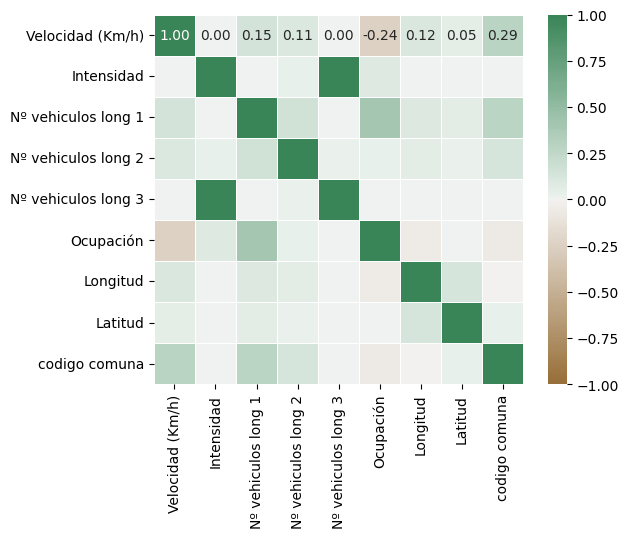

In [59]:
corre = Mob.corr()
axis_corr = sns.heatmap(corre,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True,
annot=True, linewidths=0.5, fmt=".2f")

In [60]:
corre

,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Ocupación,Longitud,Latitud,codigo comuna
Velocidad (Km/h),1.000000,0.001722,0.146711,0.108924,0.000691,-0.243961,0.115181,0.049376,0.285671
Intensidad,0.001722,1.000000,0.005353,0.028543,0.999974,0.093536,0.001273,0.000384,0.001961
Nº vehiculos long 1,0.146711,0.005353,1.000000,0.159557,0.000211,0.399221,0.098254,0.057939,0.273917
Nº vehiculos long 2,0.108924,0.028543,0.159557,1.000000,0.023060,0.029596,0.058772,0.018121,0.131890
Nº vehiculos long 3,0.000691,0.999974,0.000211,0.023060,1.000000,0.000876,0.000531,0.000087,0.000472
Ocupación,-0.243961,0.093536,0.399221,0.029596,0.000876,1.000000,-0.049007,0.000106,-0.065339
Longitud,0.115181,0.001273,0.098254,0.058772,0.000531,-0.049007,1.000000,0.129144,-0.005209
Latitud,0.049376,0.000384,0.057939,0.018121,0.000087,0.000106,0.129144,1.000000,0.025041
codigo comuna,0.285671,0.001961,0.273917,0.131890,0.000472,-0.065339,-0.005209,0.025041,1.000000
